In [2]:
import os
import sys

repository_path = r"/home/emmanuel/EQviewer"  ##change this path where is located the main directory
rep_data = os.path.join("..","data")
rep_out = os.path.join("..","outs")
sys.path.insert(0,repository_path)

# Catalog

In this nothebook, you will see some examples to manipulate the Catalog object. You also will learn how to use it to plot it in your map.

In [3]:
import pandas as pd
from EQViewer.eqviewer import Catalog,BasePlot

Catalog object receives a dataframe as input. We are going to load earthquakes saved in 'catalog.csv' taken from [Enhanced Geothermal Systems Earthquake Catalog Search](https://ncedc.org/egs/catalog-search.html).

In [8]:
catalogpath = os.path.join(rep_data,"earthquakes","catalog.csv")
df = pd.read_csv(catalogpath,parse_dates=["origin_time"])
df

,origin_time,latitude,longitude,depth,magnitude
0,2016-01-01 00:38:25.960,38.79848,-122.77039,0.000,1.03
1,2016-01-01 00:38:34.360,38.79730,-122.76723,3.513,0.54
2,2016-01-01 00:40:46.490,38.75665,-122.72328,1.779,0.26
3,2016-01-01 00:44:48.630,38.83672,-122.82730,3.511,0.11
4,2016-01-01 01:14:12.110,38.75188,-122.72581,2.259,0.35
...,...,...,...,...,...
9993,2016-03-10 12:28:02.560,38.83322,-122.79982,3.328,1.12
9994,2016-03-10 12:29:55.580,38.82775,-122.80405,3.944,0.65
9995,2016-03-10 13:03:39.510,38.80507,-122.81292,3.183,1.24
9996,2016-03-10 13:08:33.730,38.81920,-122.75978,2.768,0.21


**Note that the origin_time column must be of type datetime**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9998 entries, 0 to 9997
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   origin_time  9998 non-null   datetime64[ns]
 1   latitude     9998 non-null   float64       
 2   longitude    9998 non-null   float64       
 3   depth        9998 non-null   float64       
 4   magnitude    9998 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 390.7 KB


You can define how do you want to plot the Catalog object in your map. Take in mind the next tips:

 - BasePlot helps us with this task, it receives [pygmt.plot](https://www.pygmt.org/latest/api/generated/pygmt.Figure.plot.html) parameters, the only difference is in the size parameter. BasePlot receives it as lambda function to transform the size. 

When we print the Catalog object, it shows us the number of events.

In [43]:
cat_baseplot = BasePlot(color = "gray",
                    style="c0.1c",
                    size=None,
                    cmap = False,
                    pen = "black",
                    label="all_events")
catalog = Catalog(data=df,baseplot=cat_baseplot)
print(catalog)

Catalog | 9998 events 


Or you can print more detail information.

In [40]:
print(catalog.__str__(True))

Catalog | 9998 events 
	period: [20160101T00:38:25 - 20160310T13:17:53]
	depth : [0.0, 13.36]
	magnitude : [0.0, 3.24]
	region: [-123.08, -122.58, 38.6, 38.96]


There are some util functions. For instance, sort values by features specified in the dataframe.

In [41]:
catalog.sort_values(by="magnitude",ignore_index=True)
print(catalog.data["magnitude"])

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
        ... 
9993    2.86
9994    2.87
9995    2.98
9996    3.02
9997    3.24
Name: magnitude, Length: 9998, dtype: float64


Plot your Catalog object in a map.

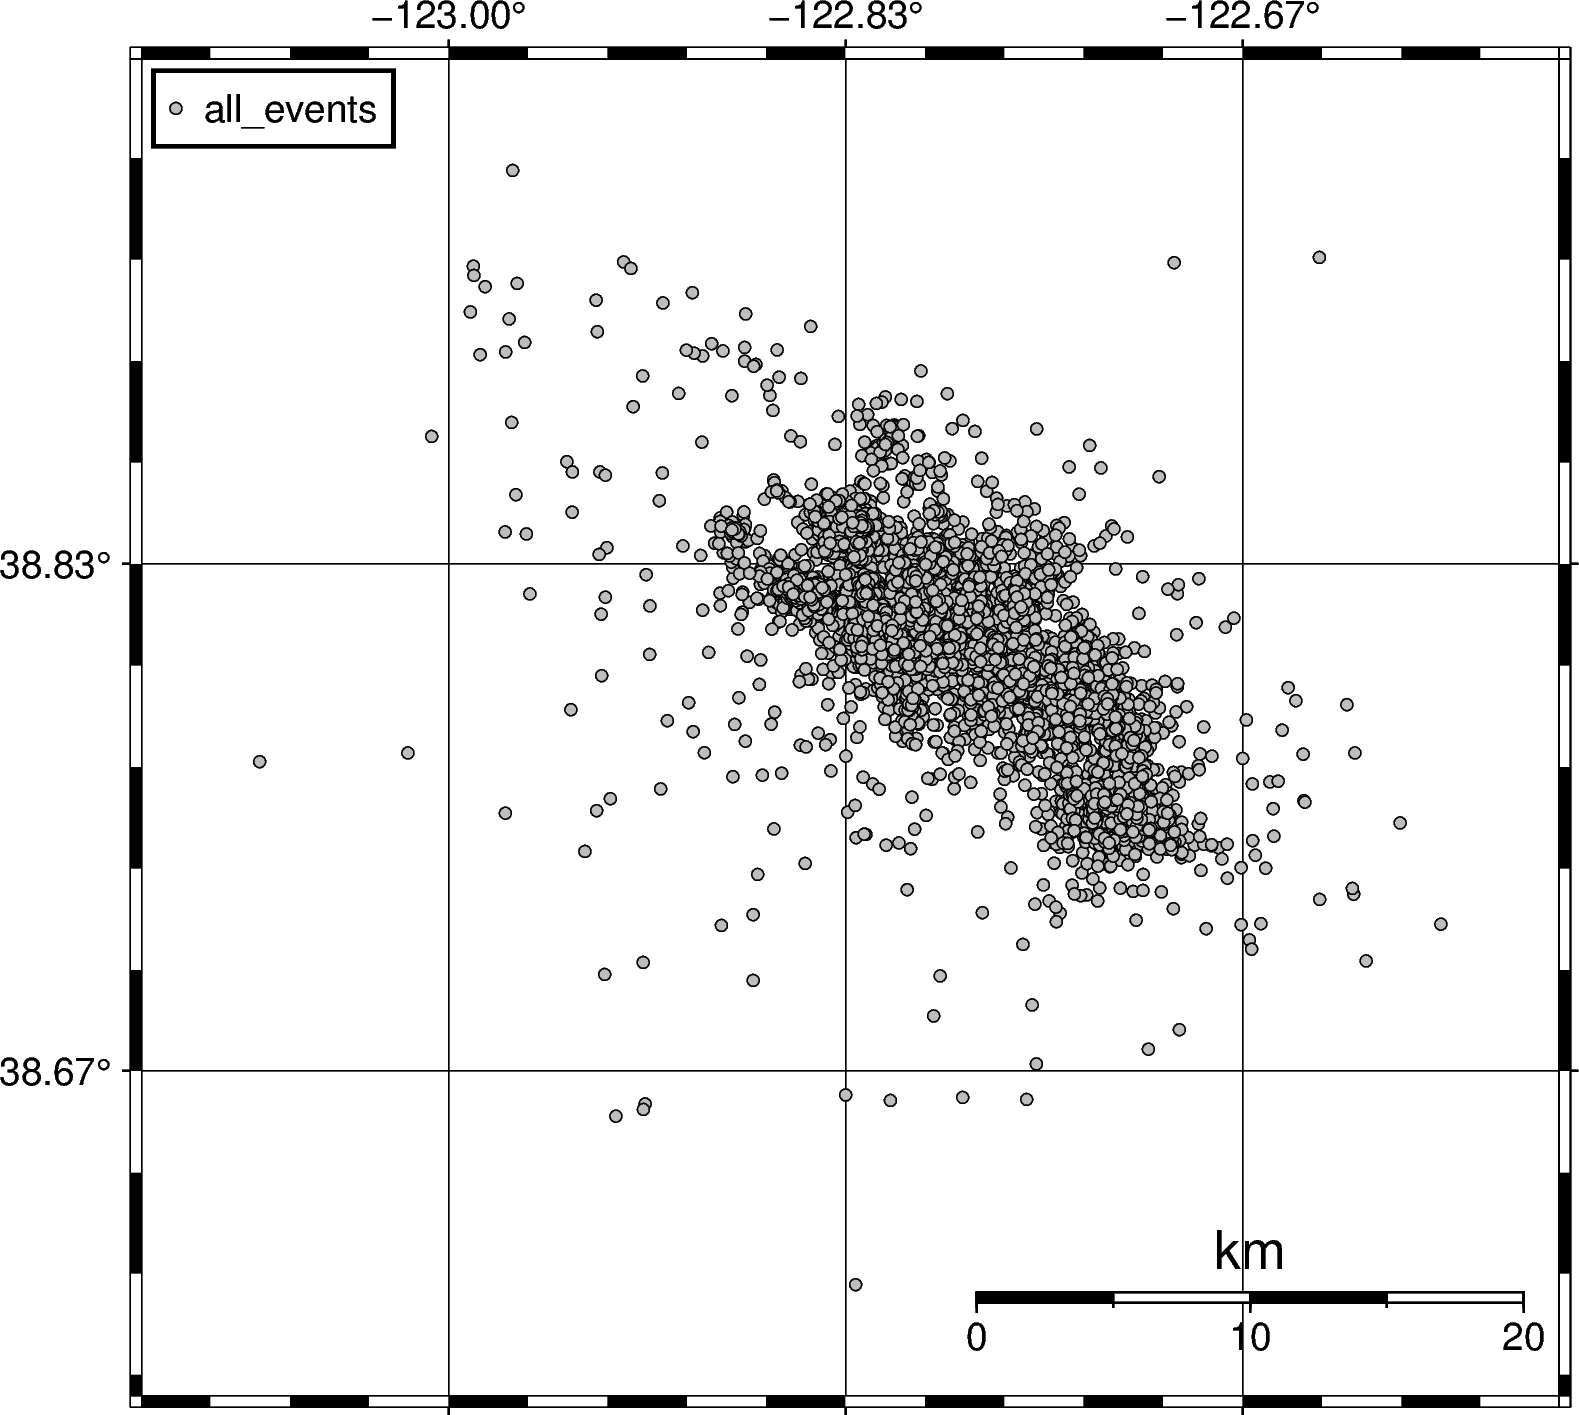

In [45]:
fig = catalog.plot_map()
fig.basemap(map_scale=f"jBR+o0.3c/0.7c+w{20}k+f+lkm+at")
fig.legend(position=f"jTL+o0.1c",box='+gwhite+p1p')
fig.show()

# Other catalogs

## Example No.1: With continuos colobar

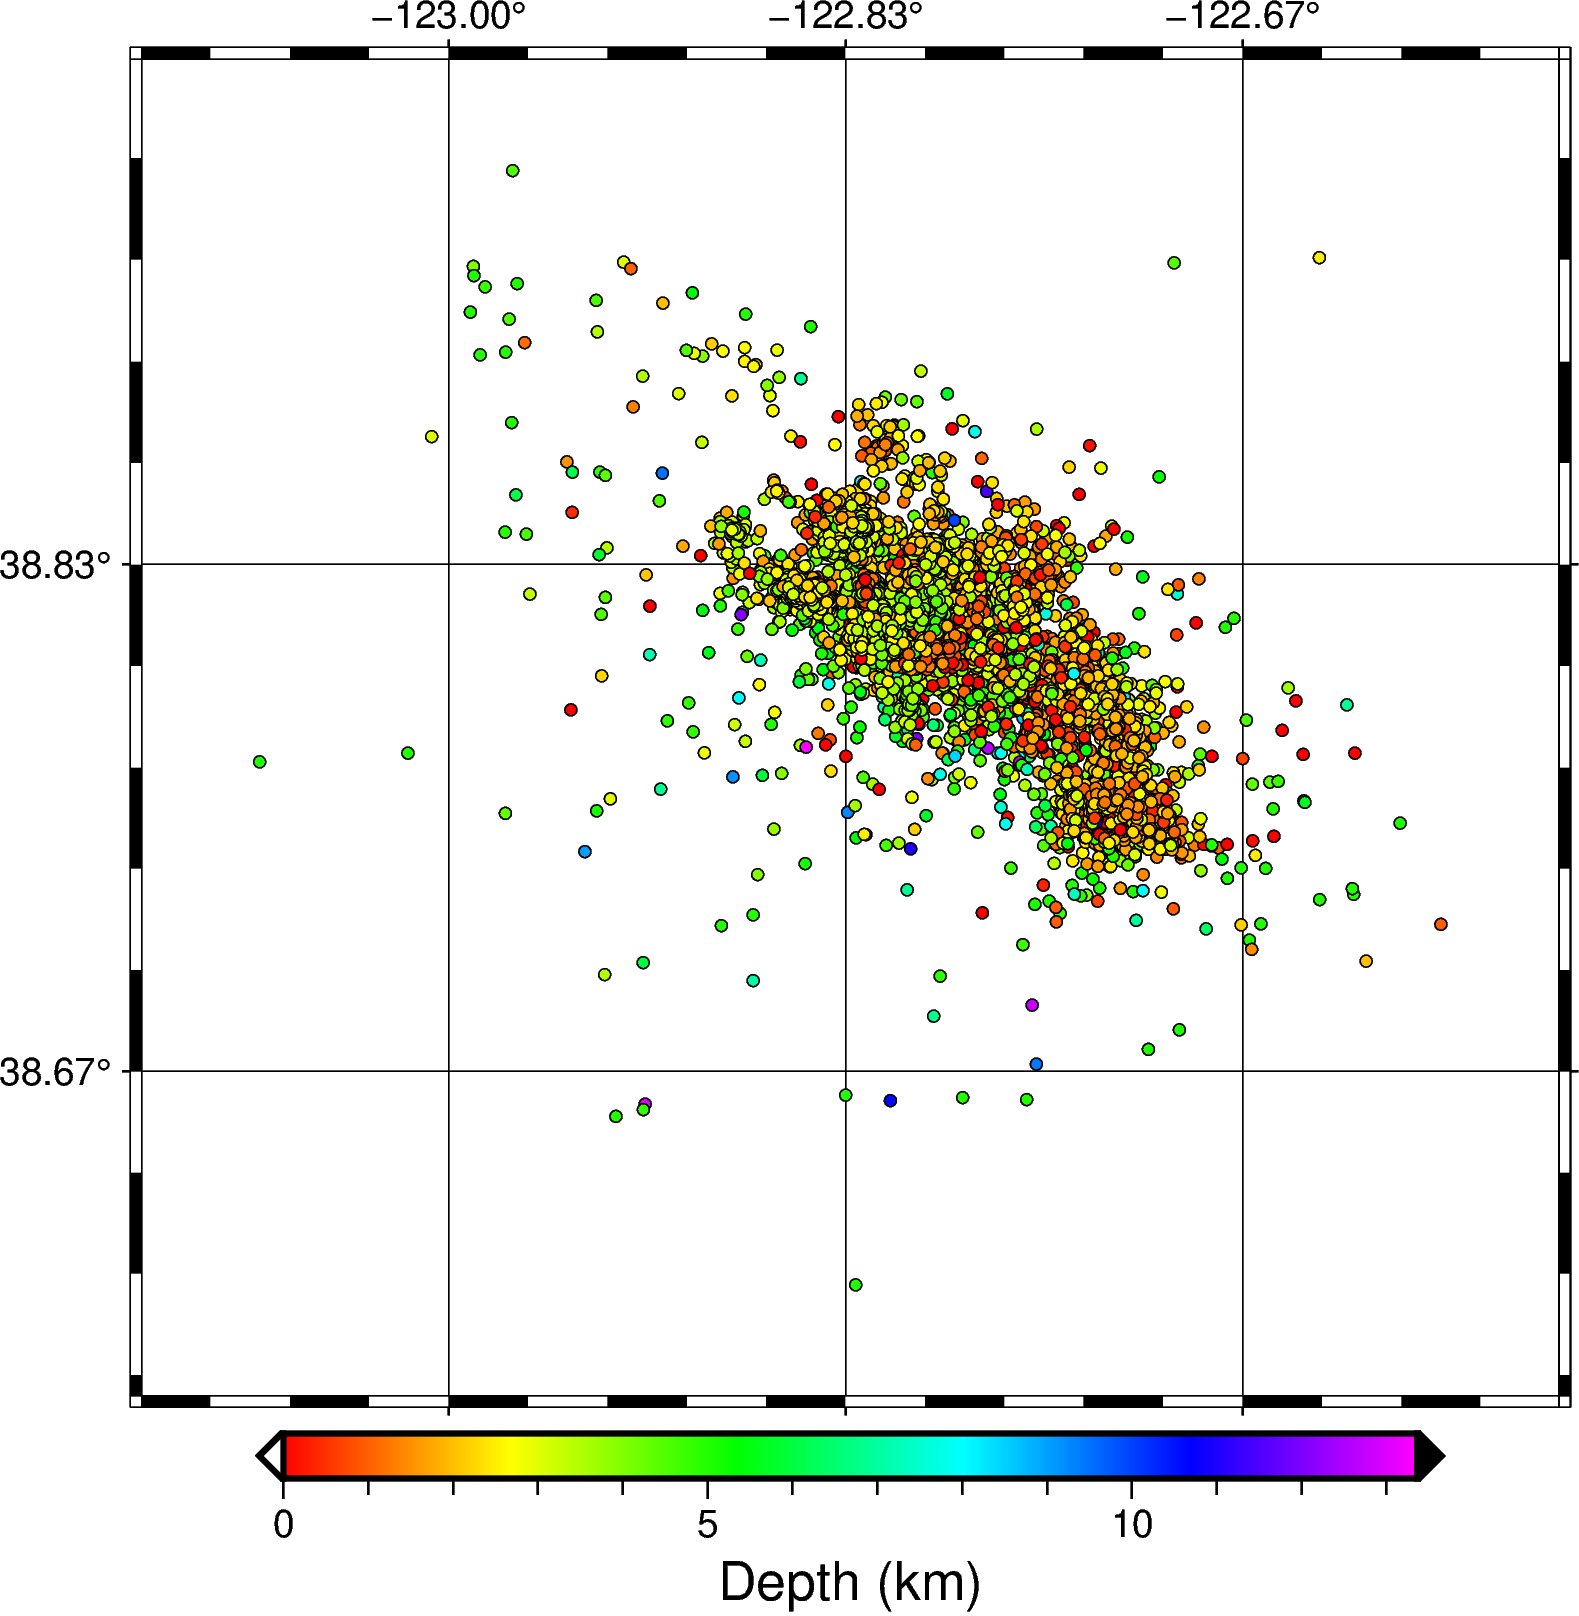

In [26]:
from EQViewer.eqviewer import Catalog,BasePlot,CPT

cat_baseplot = BasePlot(color = "gray",
                    style="c0.1c",
                    size=None,
                    cmap = True,
                    pen = "black")
cat_cpt = CPT(color_target="depth",
                label="Depth (km)",
                cmap="rainbow",
                series=[catalog.data.depth.min(),
                        catalog.data.depth.max()],
                reverse=True,
                overrule_bg=True)
cat1 = Catalog(data=df,baseplot=cat_baseplot)
fig = cat1.plot_map(cpt=cat_cpt,show_cpt=True)
fig.show()

## Example No.2: With discrete colobar

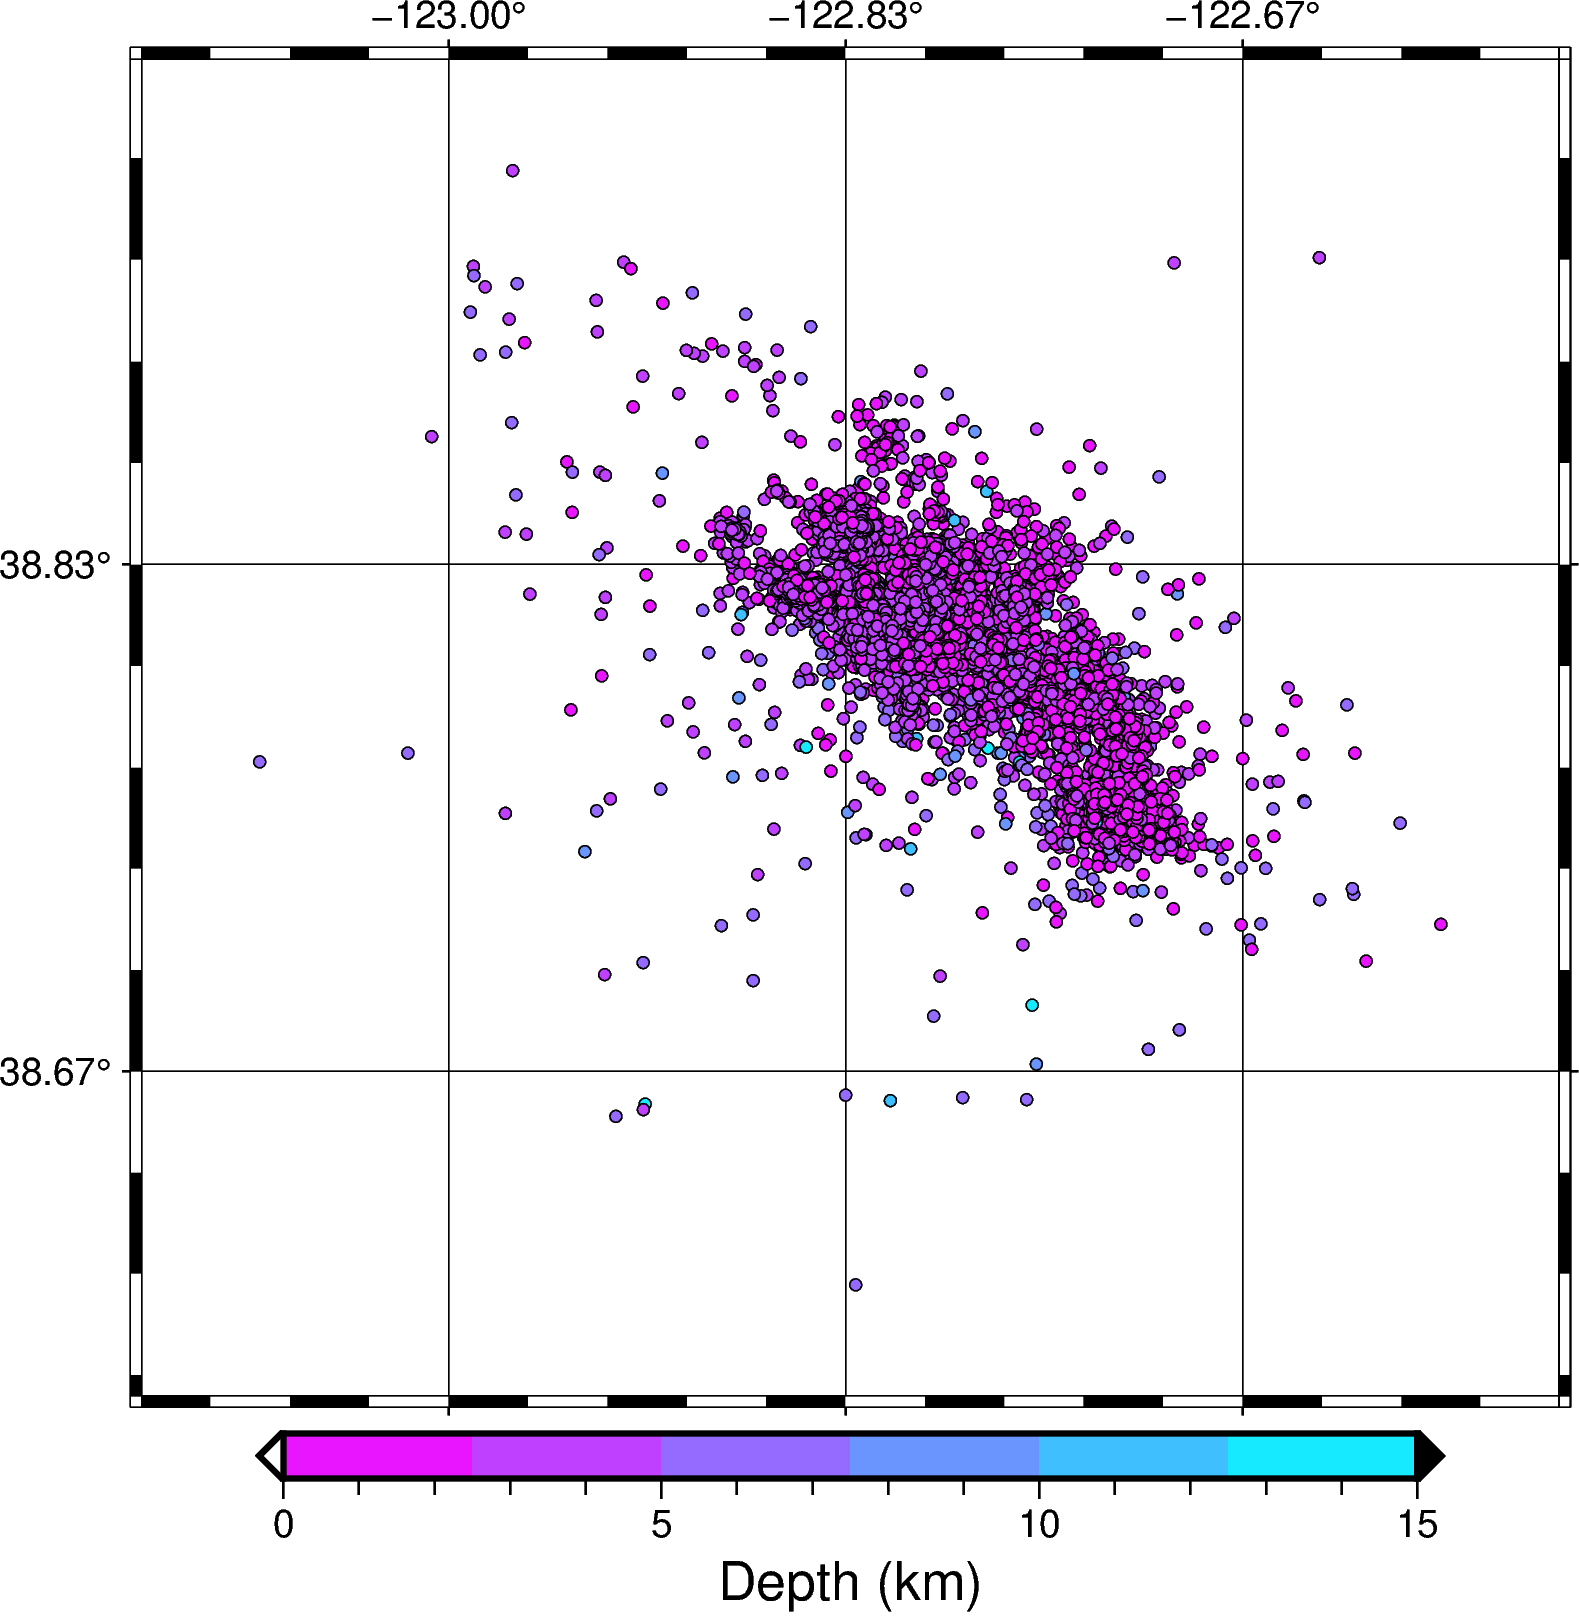

In [28]:
from EQViewer.eqviewer import Catalog,BasePlot,CPT

cat_baseplot = BasePlot(color = "gray",
                    style="c0.1c",
                    size=None,
                    cmap = True,
                    pen = "black")
cat_cpt = CPT(color_target="depth",
                label="Depth (km)",
                cmap="cool",
                series=[0,15,2.5],
                reverse=True,
                overrule_bg=True)
cat2 = Catalog(data=df,baseplot=cat_baseplot)
fig = cat2.plot_map(cpt=cat_cpt,show_cpt=True)
fig.show()

## Example No.3: With colobar and diferent size

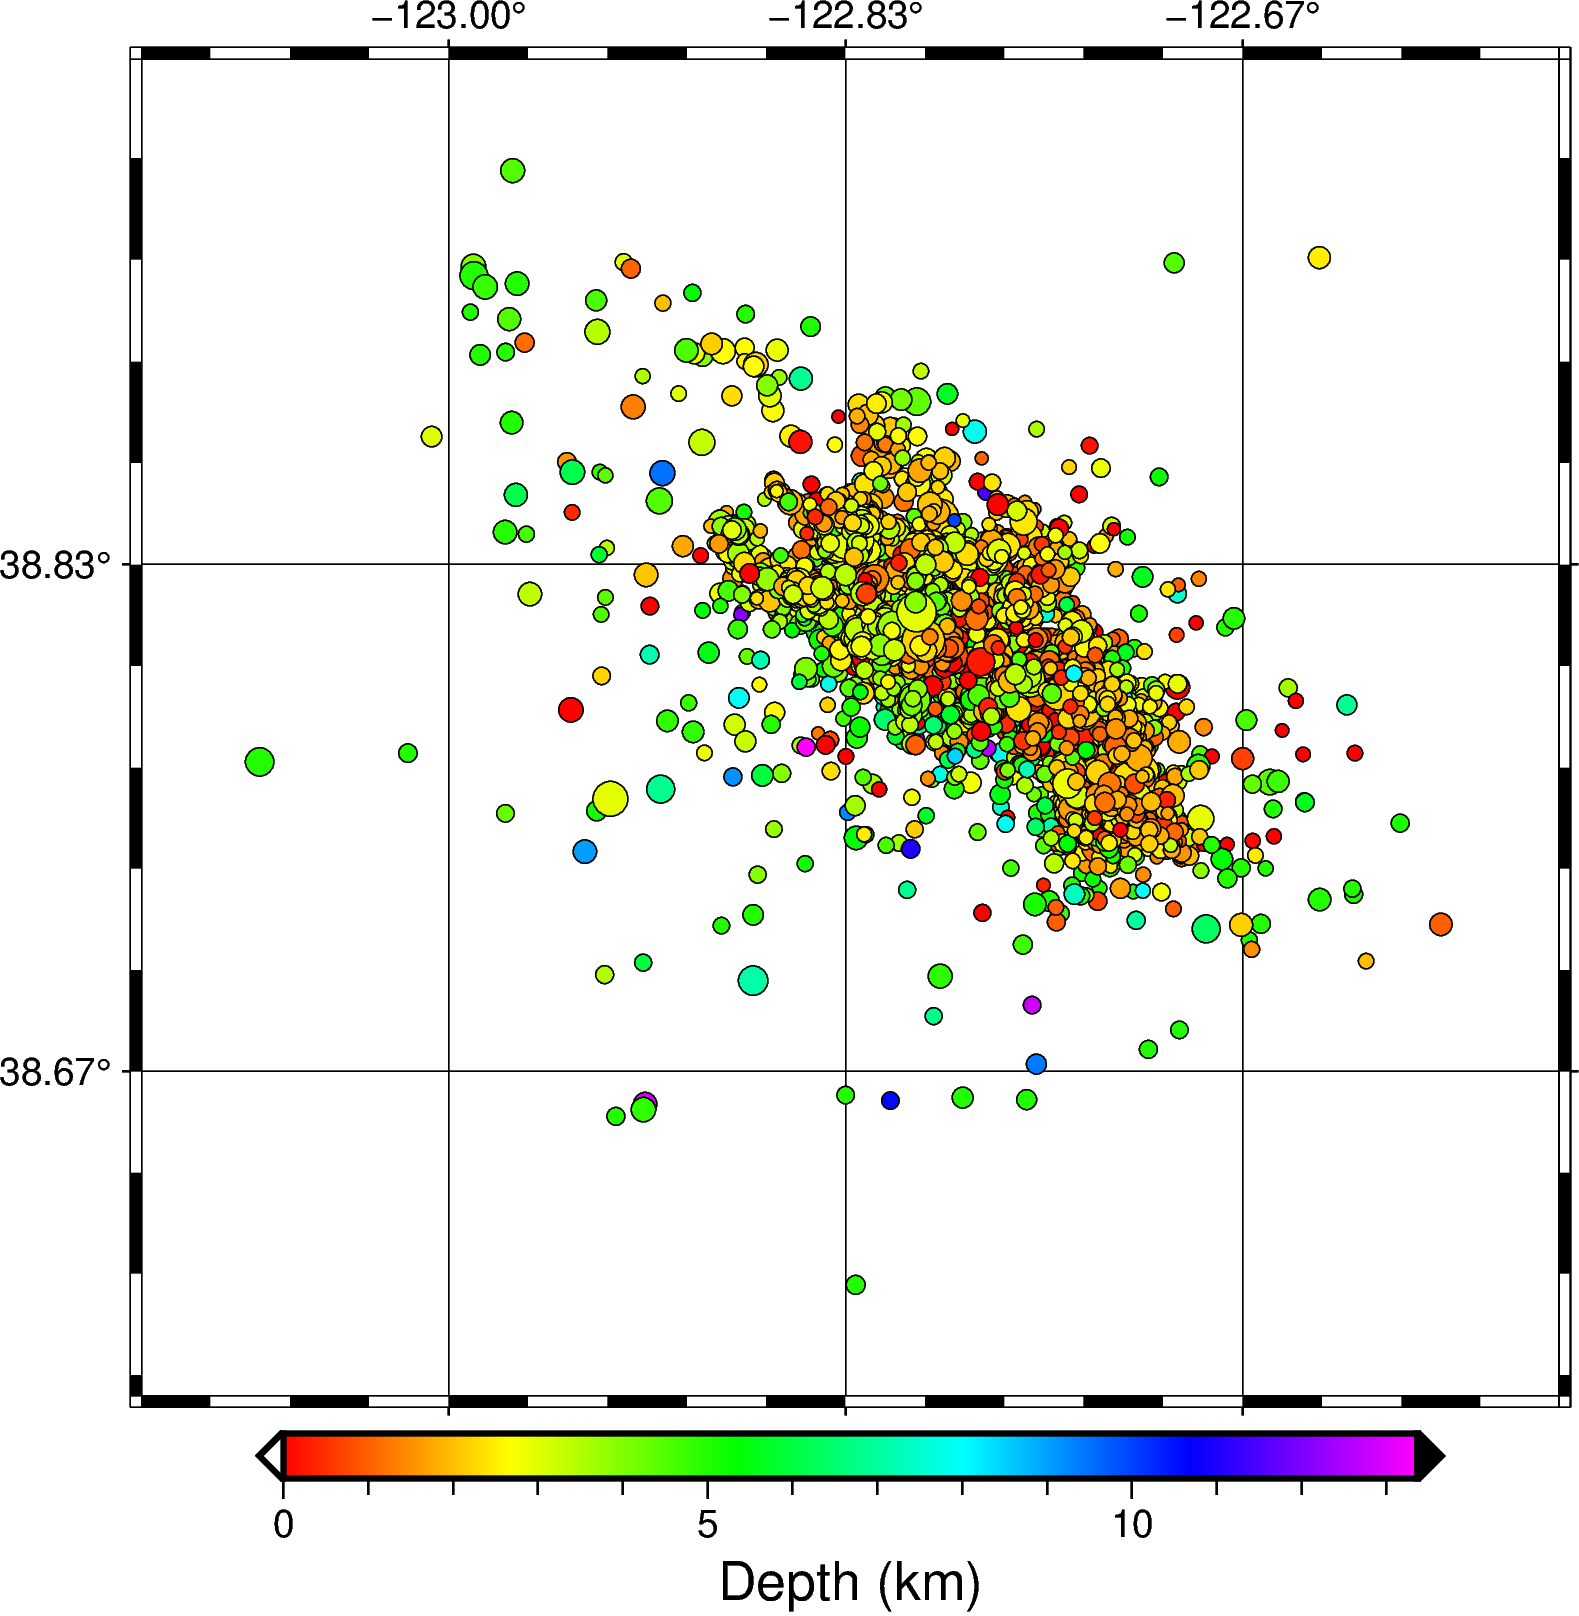

In [31]:
from EQViewer.eqviewer import Catalog,BasePlot,CPT
import numpy as np

cat_baseplot = BasePlot(color = "gray",
                    style="cc",
                    size=lambda x: 0.11 * np.sqrt(1.8 ** (x.magnitude*1.4)),
                    cmap = True,
                    pen = "black")
cat_cpt = CPT(color_target="depth",
                label="Depth (km)",
                cmap="rainbow",
                series=[catalog.data.depth.min(),
                        catalog.data.depth.max()],
                reverse=True,
                overrule_bg=True)
cat3 = Catalog(data=df,baseplot=cat_baseplot)
fig = cat3.plot_map(cpt=cat_cpt,show_cpt=True)
fig.show()

# MulCatalog

MulCatalog refers to multiple Catalog objects. It receives a list of Catalog objects and inheridate every method.

In [32]:
from EQViewer.eqviewer import MulCatalog

We will use different catalogs to instance MulCatalog

In [37]:
filter_domain=[-122.92462,-122.76703,38.74915,38.88327]
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
catalog1 = catalog.copy()
catalog1.filter_region(polygon=pol2filter)
catalog1.baseplot.style = "c0.2c"
catalog1.baseplot.color = "cyan"
catalog1.baseplot.cmap = False
catalog1.baseplot.label = "Group_1"

filter_domain=[-122.76647,-122.65638,38.74915 ,38.85847] 
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
catalog2 = catalog.copy()
catalog2.filter_region(polygon=pol2filter)
catalog2.baseplot.style = "c0.2c"
catalog2.baseplot.color = "red"
catalog2.baseplot.cmap = False
catalog2.baseplot.label = "Group_2"

filter_domain=[-122.75026,-122.56920,38.68506 ,38.80840]  
pol2filter = [(filter_domain[0],filter_domain[2]),
                (filter_domain[0],filter_domain[3]),
                (filter_domain[1],filter_domain[3]),
                (filter_domain[1],filter_domain[2]),
                (filter_domain[0],filter_domain[2])
                ]
catalog3 = catalog.copy()
catalog3.filter_region(polygon=pol2filter)
catalog3.baseplot.style = "c0.2c"
catalog3.baseplot.color = "seagreen"
catalog3.baseplot.cmap = False
catalog3.baseplot.label = "Group_3"

mulcatalog = MulCatalog(catalogs=[catalog1,catalog2,catalog3])
print(mulcatalog)

Catalogs (3 catalogs)
----------------------
1. Catalog | 7158 events 
2. Catalog | 2360 events 
3. Catalog | 2023 events 


Plot your mulcatalog object in a map.

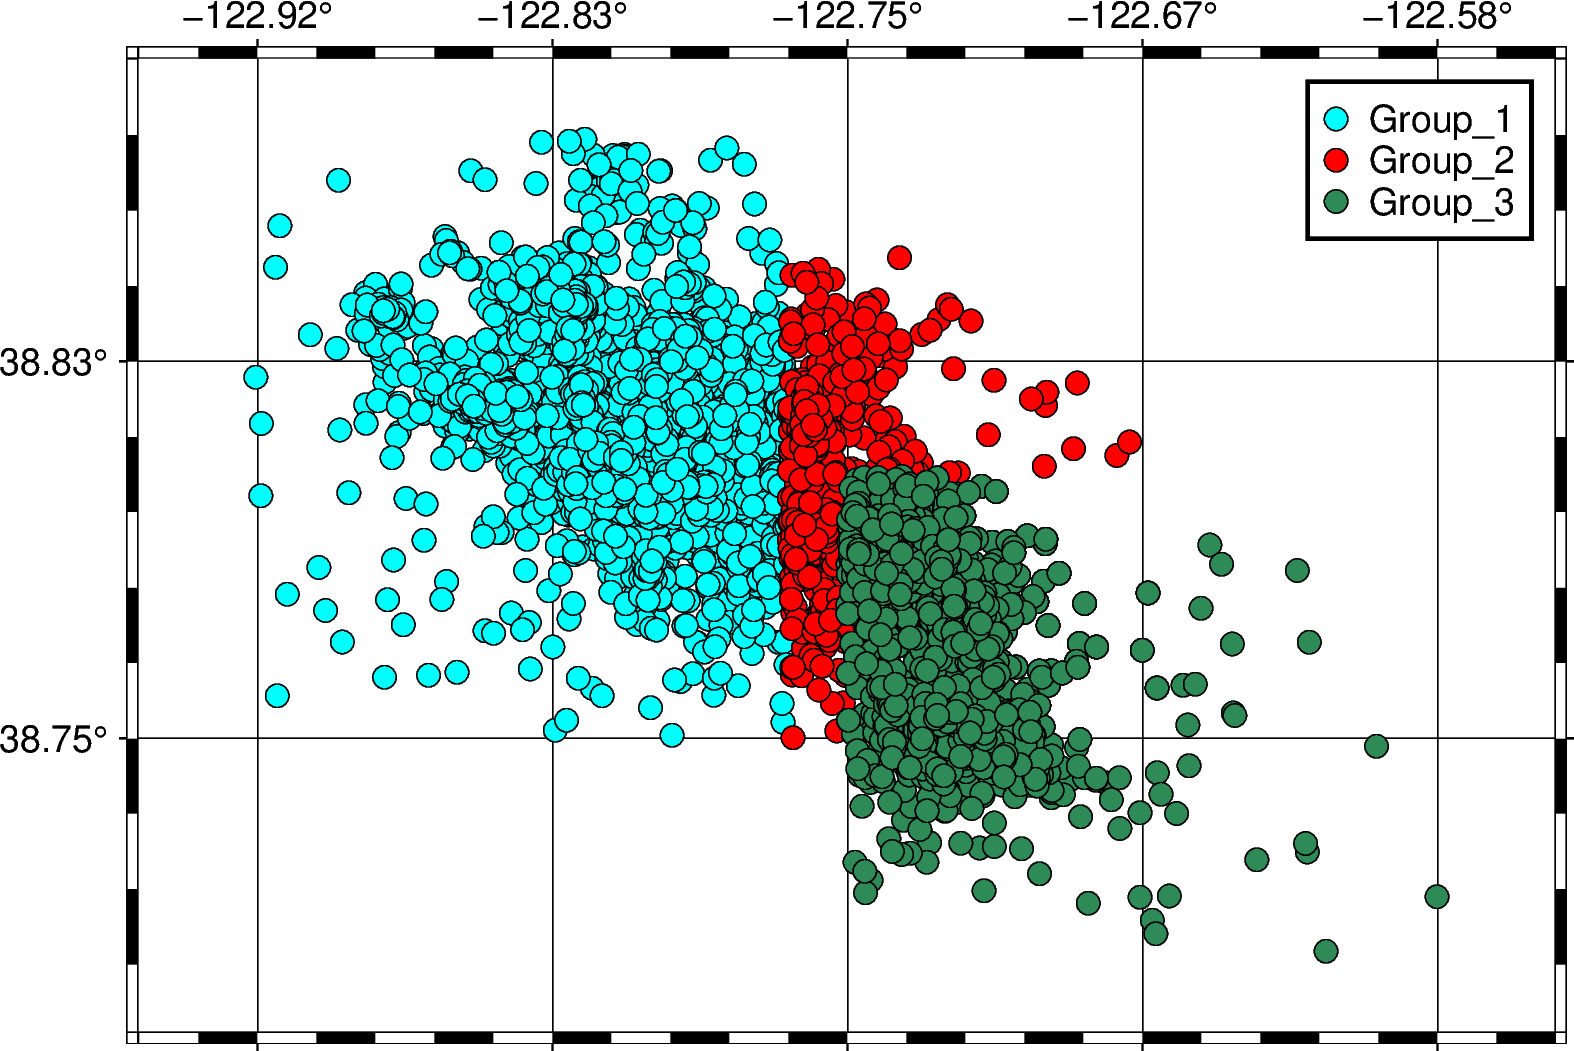

In [38]:
fig = mulcatalog.plot_map()
fig.legend()
fig.show()